# 数据可视化作业题目

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [46]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


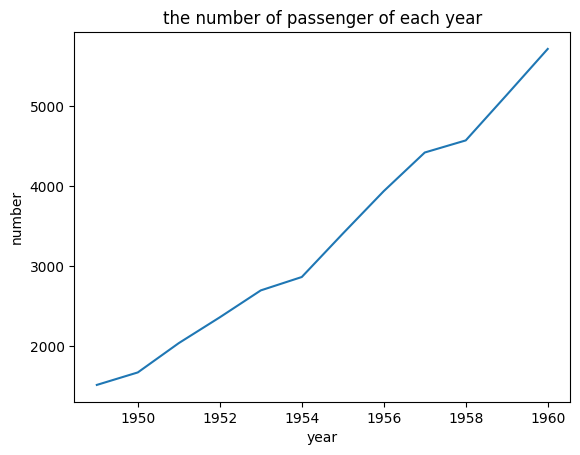

In [47]:
#matplotlib
def draw_fig(data1,x_,y_,title,x_label,y_label='number',c_type=1):
    plt.figure()
    #c_type为曲线类型1为折线图、2为柱状图。
    if c_type==1:
        plt.plot(x_,y_)
    elif c_type==2:
        plt.bar(data1['passengers'].index,data1['passengers'])
    else:
        print('please check your input of c_type')
        return 0
    #设置xy轴以及标题
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
#汇总数据
data1=data[['year','passengers']].groupby('year',observed=False).agg('sum')
#画折线图
draw_fig(data1,
         data1['passengers'].index,
         data1['passengers'],
         x_label='year',
         title='the number of passenger of each year')



答：从上图可以看出乘客总量总体呈上升趋势，并且乘客总量与年份可能存在线性关系。

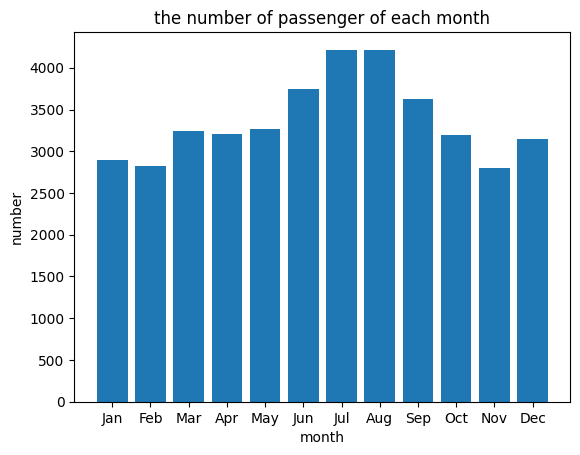

In [48]:
data2=data[['month','passengers']].groupby('month',observed=False).agg('sum')
draw_fig(data2,
         data2['passengers'].index,
         data2['passengers'],
         x_label='month',
         title='the number of passenger of each month',
         c_type=2)

答：从上图可以看出每年的乘客总量高峰在7,8月份。2月至7月一直在上升，8月后一直在下降，1月，12月份有反常。这些现象出现的原因可能与放假有关。

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [49]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


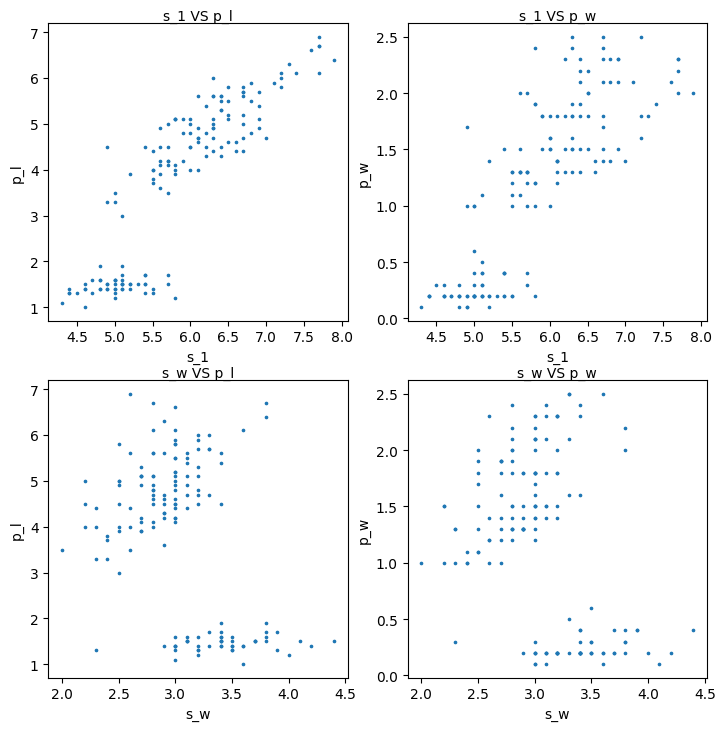

In [50]:
#matplotlib
#给出坐标轴名称
xlab=['s_1','s_w']
ylab=['p_l','p_w']
#给出title名称
title=[[i+' VS '+j for j in ylab] for i in xlab]
#批量画出4幅散点图
def draw_scatter(xlab,ylab,Title):
    #创建画布，将控制子图的对象传递给axs变量
    fig,axs=plt.subplots(2,2,figsize=(8.5,8.5))
    sepal=np.array([data['sepal_length'],data['sepal_width']])
    petal=np.array([data['petal_length'],data['petal_width']])
    #批量画出散点图
    for i in range(2):
        for j in range(2):
            axs[i][j].scatter(sepal[i],
                              petal[j],
                              linewidths=.9,
                              s=3)
            axs[i][j].set_xlabel(xlab[i])
            axs[i][j].set_ylabel(ylab[j])
            #微调了title字体大小与x标轴刻度以及显示范围
            axs[i][j].set_title(Title[i][j],fontsize=10,pad=2)
            if i==0:
                axs[i][j].set_xticks(np.arange(np.min(sepal[i])+0.2,np.max(sepal[i]+0.2),0.5))
            else:
                axs[i][j].set_xticks(np.arange(np.min(sepal[i]),np.max(sepal[i]+0.5),0.5))

draw_scatter(xlab,ylab,title)

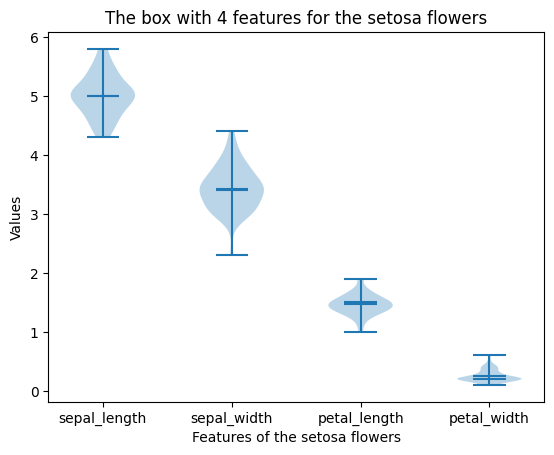

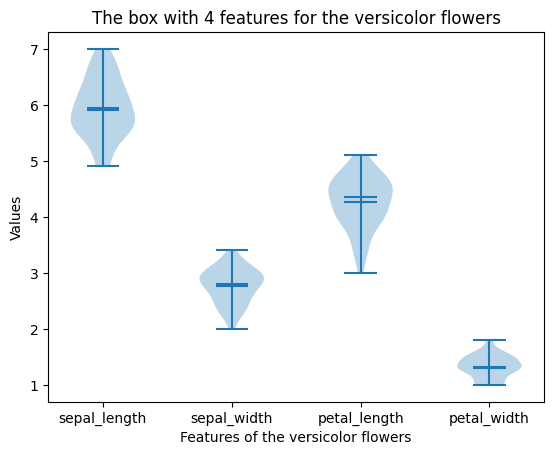

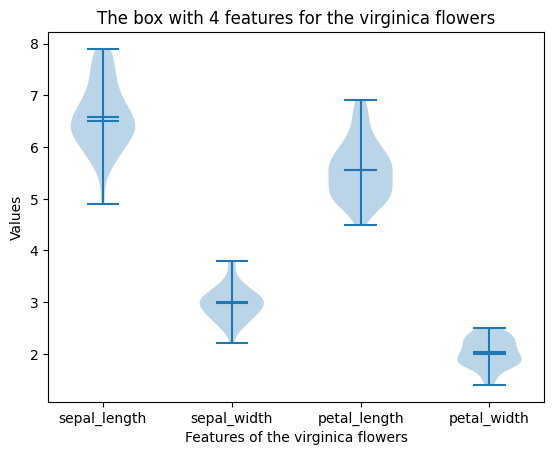

In [51]:

def draw_violin(data1 , f_type='setosa'):
    #f_type表示花的种类
    #新建画布防止都堆叠在一张图上
    plt.figure(f_type)
    #显示中值，平均值，最值。
    plt.violinplot([data1['sepal_length'],
                            data1['sepal_width'],
                            data1['petal_length'],
                            data1['petal_width']],
                            showmedians=True,
                            showmeans=True,
                            showextrema=True)
    #修改x轴显示，给出坐标轴名称
    plt.xticks([1,2,3,4],labels=data1.keys())
    plt.xlabel('Features of the '+f_type+' flowers')
    plt.ylabel('Values')
    plt.title('The box with 4 features for the '+f_type+' flowers')

#给出花的种类
spcies=['setosa','versicolor','virginica']
for i in range(len(spcies)):
    data1=data[['sepal_length',
                'sepal_width',
                'petal_length',
                'petal_width']][data["species"]==spcies[i]]
    draw_violin(data1,spcies[i])

setosa花的花萼长度更集中，宽度最分散但是整体最宽，花瓣长度与宽度是最小的；
versicolor的花萼长度更长，宽度整体最大，花瓣长度中等，宽度中等；
virginica的花萼的宽度最小也更集中，并且它的花瓣整体上是最长的，也是最宽的。

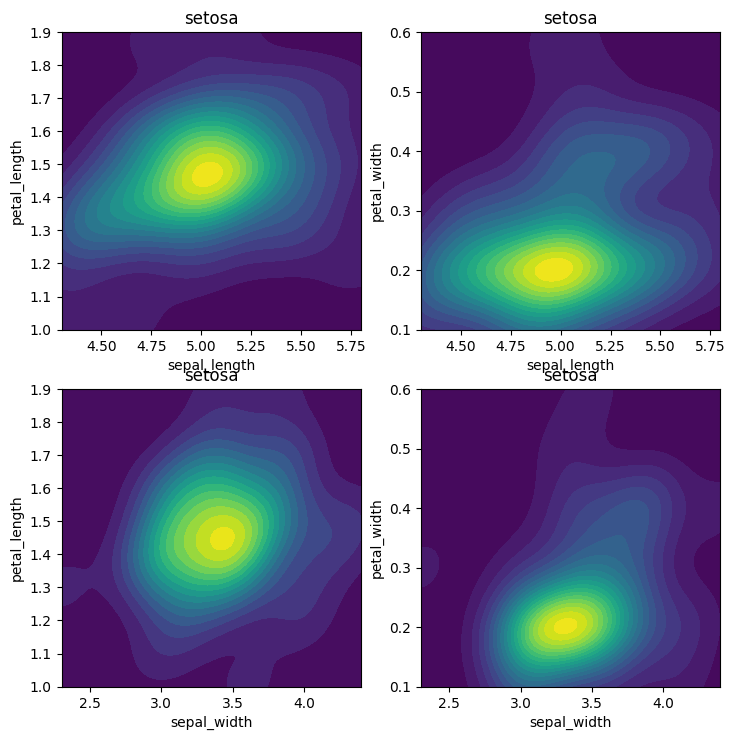

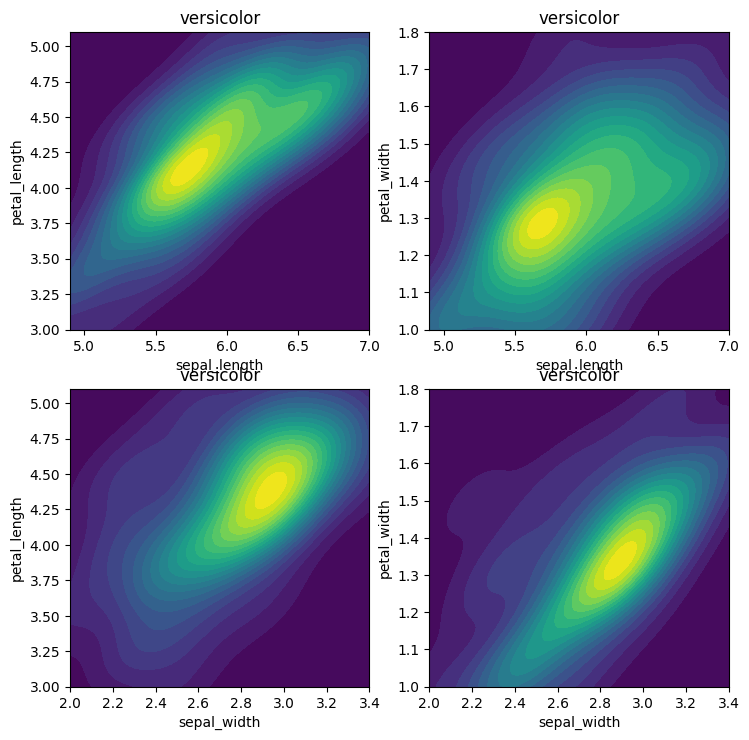

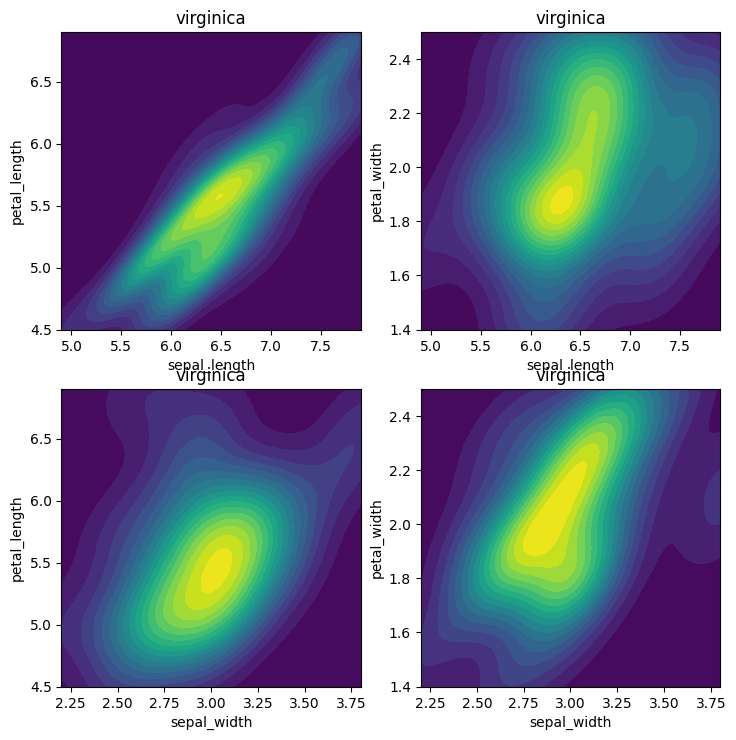

In [52]:
import scipy.stats 
def draw_KDE(data1 , f_type='setosa'):\
#画单个类的KDE以及灰度图
    spcies=['sepal_length',
            'sepal_width',
            'petal_length',
            'petal_width']
    for i in range(4):
        plt.figure()
        #设置分割数
        intageral_n=200
        #核密度法拟合数据的真实分布
        af=scipy.stats.gaussian_kde(data1[spcies[i]])
        af.covariance_factor=lambda:.3
        af._compute_covariance()
        #设置坐标轴显示区域
        x=np.arange(min(data1[spcies[i]]),
                    max(data1[spcies[i]]),
                    (max(data1[spcies[i]])-min(data1[spcies[i]]))/intageral_n)
        #令核密度估计面积与直方图面积相等，求出比例prop_n将核密度分析图y轴放大，显示实际情况就令该比例为1
        prop_n=sum(data1[spcies[i]])*intageral_n/(intageral_n*len(data1[spcies[i]]))
        plt.plot(x,af(x)*prop_n)
        #显示灰度图做比较
        plt.hist(data1[spcies[i]],bins=10)
        #修改x轴显示，给出坐标轴名称
        plt.xlabel(f_type+" "+spcies[i])
        plt.ylabel('Frequency')
        plt.title('Distribution of the '+f_type+' '+spcies[i])

def draw_KDE_S(data1,f_type='setosa'):
    #画2个类的核密度估计
    sepal=['sepal_length',
            'sepal_width']
    petal=['petal_length',
            'petal_width']
    #生成画板，将子图放到上面并设置其大小
    ax=plt.subplots(2,2,figsize=(8.5,8.5))[1]
    for i in range(2):
        for j in range(2):
            #给出kde方法生成点数
            intageral_n=200j
            #加载数据并用kde方法拟合
            df=data1[sepal[i]]
            df2=data1[petal[j]]
            df_t=np.vstack([df,df2])
            df_c=scipy.stats.gaussian_kde(df_t)
            #设置显示区域
            x, y = np.mgrid[min(data1[sepal[i]]):max(data1[sepal[i]]):intageral_n,
                            min(data1[petal[j]]):max(data1[petal[j]]):intageral_n]
            positions = np.vstack([x.ravel(), y.ravel()])
            f = np.reshape(df_c(positions).T, x.shape)
            ax[i][j].contourf(x,y,f,20)
            #ax[i][j].contour(x,y,f,20)
            #修改x轴显示，给出坐标轴名称
            ax[i][j].set_xlabel(sepal[i])
            ax[i][j].set_ylabel(petal[j])
            ax[i][j].set_title(f_type)



spcies=['setosa','versicolor','virginica']
for i in range(len(spcies)):
    data1=data[['sepal_length',
                'sepal_width',
                'petal_length',
                'petal_width']][data["species"]==spcies[i]]
    #draw_KDE(data1,f_type=spcies[i])
    draw_KDE_S(data1,f_type=spcies[i])

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [53]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


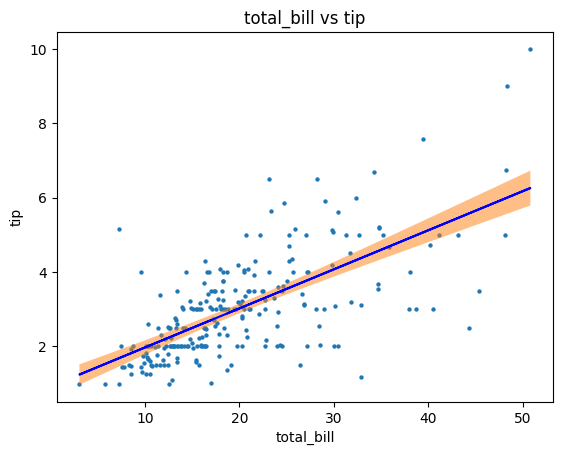

In [54]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table

def sort_three_list(base_list,list1,list2):
    #这里将上下边界按base_list排序，防止画图出现意外。
    li1=np.zeros(len(base_list))
    li2=np.zeros(len(base_list))
    mid_list=np.argsort(base_list)
    for index in range(len(base_list)):
        li1[index]=list1[mid_list[index]]
        li2[index]=list2[mid_list[index]]
    base_list.sort()
    return base_list,li1,li2

def draw_scatter_OLS_fig(x_data,y_data,x_label,y_label,title):
    #画线性回归曲线（最小二乘法）
    #使用相关包函数给出预测值
    x_=sm.add_constant(x_data)
    y_=y_data
    regr=sm.OLS(y_,x_)
    res=regr.fit()

    data2= summary_table(res, alpha=.05)[1]
    fitted_values = data2[:,2]
    low_,upp_=data2[:,4:6].T
    #画真实值的分布
    x2=np.array(x_data)
    x2,y3,y4=sort_three_list(base_list=x2,list1=low_,list2=upp_)
    plt.scatter(x_data,y_data,s=5,linewidths=.9)
    plt.fill_between(x=x2,y1=y3,y2=y4,alpha=.5)
    #这里可能出现意外，上面函数就是处理这个意外，结果可以注释上一行使用改行绘图
    #plt.fill_between(x_data,low_,upp_,alpha=.3)
    plt.plot(x_data,fitted_values,'b')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

data1=data[['total_bill','tip']]
draw_scatter_OLS_fig(x_data=data1['total_bill'],
                     y_data=data1['tip'],
                     x_label='total_bill',
                     y_label='tip',
                     title='total_bill vs tip')

答：从上图可以看出总花费与小费可以近似认为存在线性关系，随着总花费的上升小费金额也在上升；总额小的时候给的小费更集中，大时更加分散。

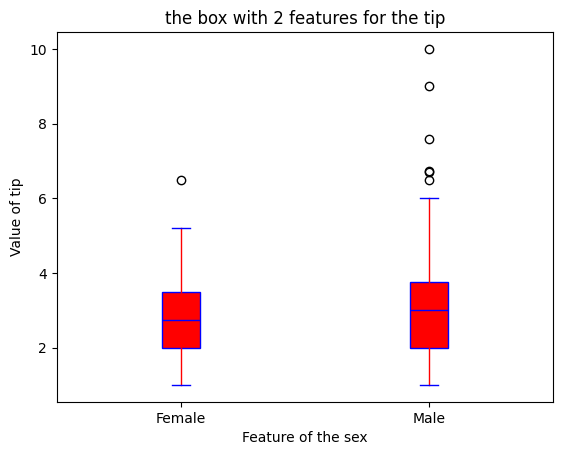

In [55]:
def draw_boxplot(data_,t_name,d_name):
    #绘制箱图函数
    type_container=list(set(data_[t_name]))
    box_list=[]
    element_num=len(type_container)
    for i in range(element_num):
        box_list.append(data_[data_[t_name]==type_container[i]][d_name])

    plt.boxplot(box_list,
                patch_artist=True,
                medianprops={'color':'b'},
                boxprops={'facecolor':'r','color':'b'},
                whiskerprops={'color':'r'},
                capprops={'color':'b'})
    plt.xticks(range(1,element_num+1),labels=type_container)
    plt.xlabel('Feature of the '+t_name)
    plt.ylabel('Value of '+d_name)
    plt.title(f'the box with {element_num} features for the '+d_name)
    
draw_boxplot(data,t_name='sex',d_name='tip')

答：女性给的小费多余男性且更分散

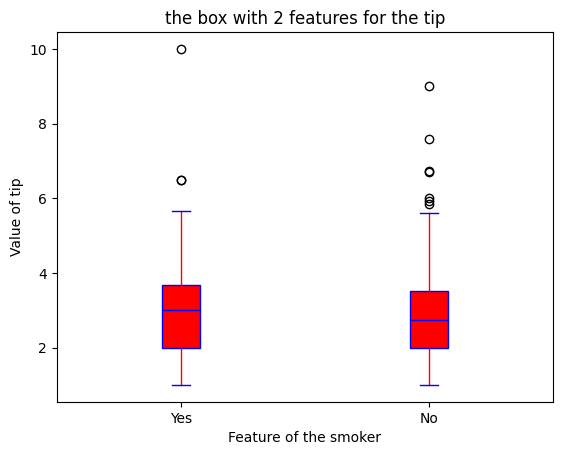

In [56]:
draw_boxplot(data,t_name='smoker',d_name='tip')

答：吸烟者给的小费多余不吸烟者且更分散。

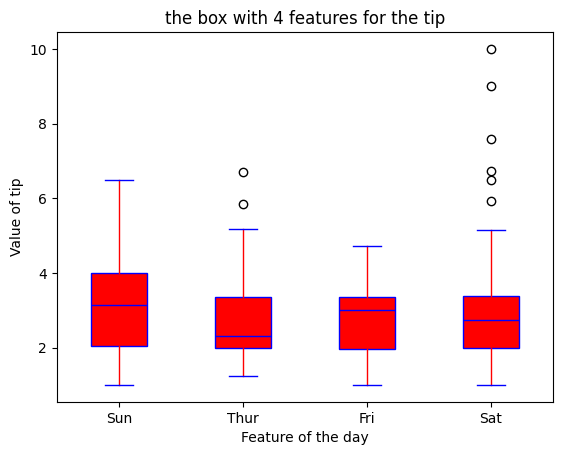

In [57]:
draw_boxplot(data,t_name='day',d_name='tip')

答：周日给的小费较多且更加分散

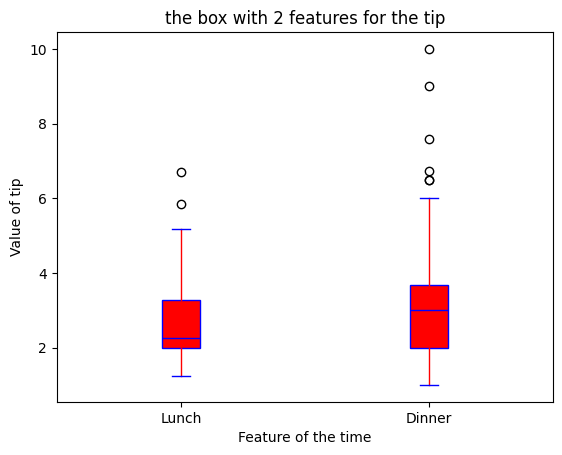

In [58]:
draw_boxplot(data,t_name='time',d_name='tip')

答：晚餐给的小费更多，更加分散。

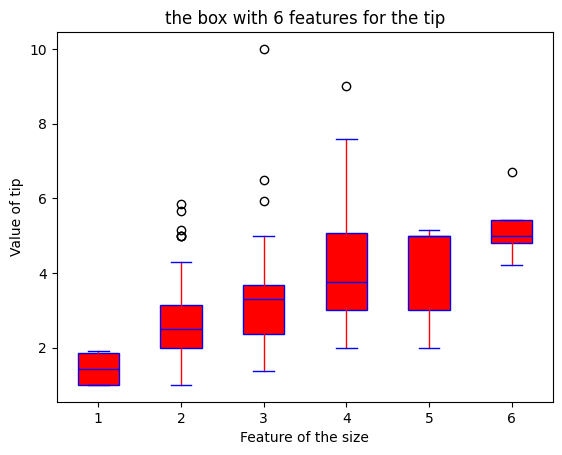

In [59]:
draw_boxplot(data,t_name='size',d_name='tip')

答：就餐人数越多给的小费就越多，这可能跟好面子相关。

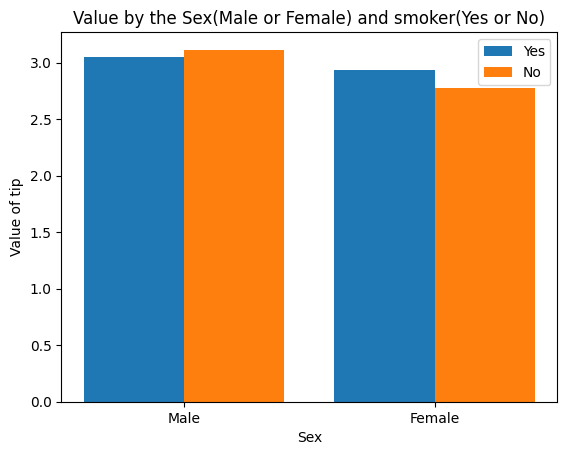

In [60]:
data3=data[['smoker','sex','tip']].pivot_table(index='sex',columns='smoker',values='tip')

def draw_bar(x_,y_data,x_label,y_label,title,t_width):
    #给出一种化条形图的格式
    num=len(y_data)
    s_width=t_width/num
    al=np.arange(t_width,(num)*1.25*t_width,step=t_width*1.25)
    for i in range(num):
        plt.bar(x_+i*s_width+al,y_data[y_data.keys()[i]],width=s_width,label=y_data.keys()[i])
    plt.xticks(x_+al+s_width/2,y_data[y_data.keys()[0]].keys())
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(loc='upper right')
    
draw_bar(0.06,
         data3,
         x_label='Sex',
         y_label='Value of tip',
         title='Value by the Sex(Male or Female) and smoker(Yes or No)',
         t_width=1)

答：女性吸烟者比不吸烟者给的小费多。

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [61]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [62]:

data4=data.loc[:,['survived','pclass']]
data4['total']=np.ones(len(data['survived']),dtype=np.int8)
data4['unsurvived']=data4.loc[:,'total']-data4.loc[:,'survived']
data4=data4[['survived','unsurvived','total','pclass']].groupby('pclass').agg('sum')
data4['survived_prop']=data4.loc[:,'survived']/data4.loc[:,'total']
data4['unsurvived_prop']=data4.loc[:,'unsurvived']/data4.loc[:,'total']
data4

,survived,unsurvived,total,survived_prop,unsurvived_prop
pclass,,,,,
1,136,80,216,0.629630,0.370370
2,87,97,184,0.472826,0.527174
3,119,372,491,0.242363,0.757637


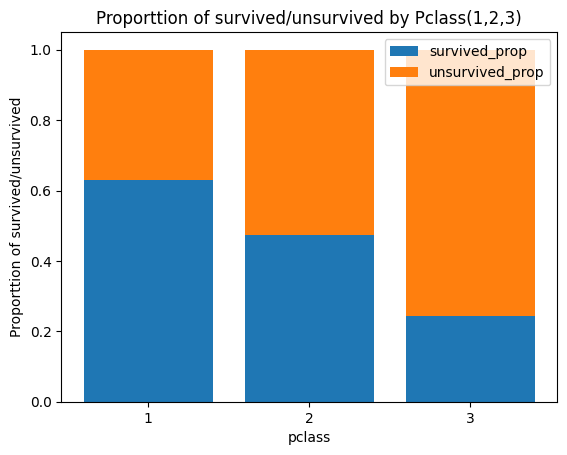

In [63]:
def draw_stackbar(x_,y_data,x_label,y_label,title,width=.5):
    num=len(y_data)
    al=np.arange(width,
                 (num)*1.25*width,
                 step=width*1.25)
    for i in range(len(y_data.keys())):
        if i==0:
            plt.bar(x_+width+al,
                    y_data[y_data.keys()[i]],
                    width=width,
                    label=y_data.keys()[i])
        else:
            plt.bar(x_+width+al,
                    y_data[y_data.keys()[i]],
                    width=width,
                    bottom=y_data[y_data.keys()[i-1]],
                    label=y_data.keys()[i])
            
    plt.xticks(x_+al+width,
               y_data[y_data.keys()[0]].keys())
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(loc='upper right')
draw_stackbar(.1,
              y_data=data4[['survived_prop','unsurvived_prop']],
              x_label='pclass',
              y_label='Proporttion of survived/unsurvived',
              title='Proporttion of survived/unsurvived by Pclass(1,2,3)')

答：3号仓位获救比例最低，1号获救比例最高。

In [64]:
data_sex=data.loc[:,['survived','sex']]
data_sex['total']=np.ones(len(data['survived']),dtype=np.int8)
data_sex['unsurvived']=data_sex.loc[:,'total']-data_sex.loc[:,'survived']
data_sex=data_sex[['survived','unsurvived','total','sex']].groupby('sex').agg('sum')
data_sex['survived_prop']=data_sex.loc[:,'survived']/data_sex.loc[:,'total']
data_sex['unsurvived_prop']=data_sex.loc[:,'unsurvived']/data_sex.loc[:,'total']
data_sex

,survived,unsurvived,total,survived_prop,unsurvived_prop
sex,,,,,
female,233,81,314,0.742038,0.257962
male,109,468,577,0.188908,0.811092


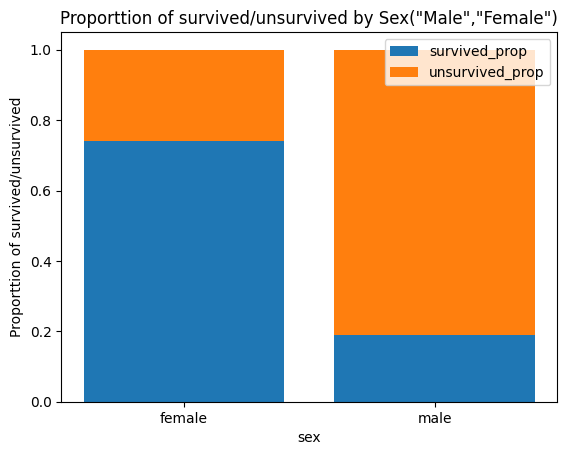

In [65]:
draw_stackbar(.1,
              y_data=data_sex[['survived_prop','unsurvived_prop']],
              x_label='sex',
              y_label='Proporttion of survived/unsurvived',
              title='Proporttion of survived/unsurvived by Sex("Male","Female")')


答：男性获救比例较低。

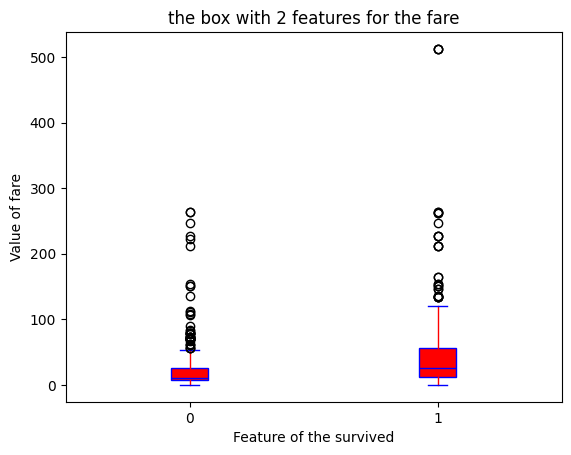

In [66]:
draw_boxplot(data,d_name='fare',t_name='survived')

答：获救人员票价平均值大于未获救人员票价平均值，获救人员票价分布更分散。

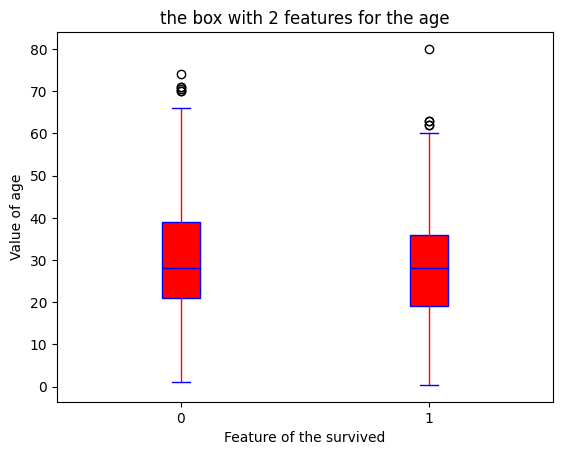

In [67]:
draw_boxplot(data[['age','survived']].dropna(),t_name='survived',d_name='age')

答：获救的平均年龄大于未获救的。

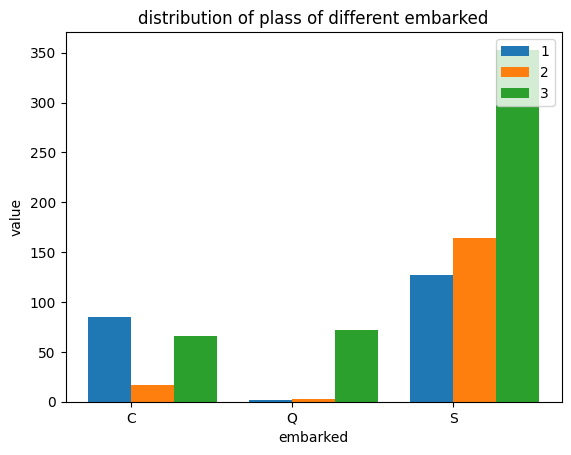

In [68]:

data_e=data.loc[:,['embarked','pclass']]
data_e['value']=np.ones(len(data['embarked']),dtype=np.int8)
data_e=pd.pivot_table(data_e,index='embarked',columns='pclass',values='value',aggfunc='sum')
data_e.head()
draw_bar(.1,
         data_e,
         x_label='embarked',
         y_label='value',
         title='distribution of plass of different embarked',
         t_width=.8)

答：3号仓买的人最多，s港上的人最多，可能是始发站。

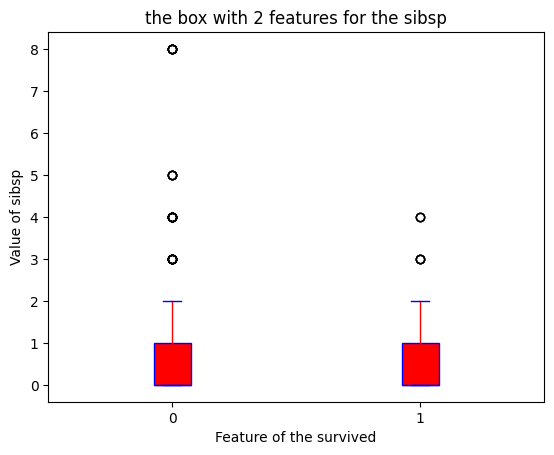

In [69]:
draw_boxplot(data,t_name='survived',d_name='sibsp')

答：未获救的人兄弟姐妹个数离群值更多，可能他们一起乘船。

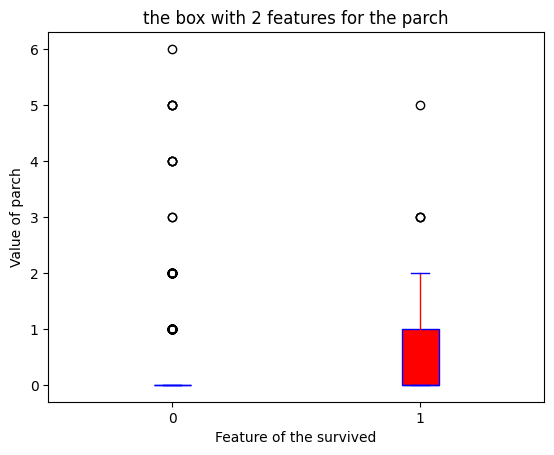

In [70]:
draw_boxplot(data,d_name='parch',t_name='survived')

答:获救的人有父母子女的更多。

In [71]:
data_b=data.loc[:,['survived','alone']]
data_b['value']=np.ones(len(data.loc[:,'alone']),dtype=np.int8)
data_b=data_b.pivot_table(index='alone',columns='survived',values='value',aggfunc='sum')
data_b

survived,0,1
alone,,
False,175,179
True,374,163


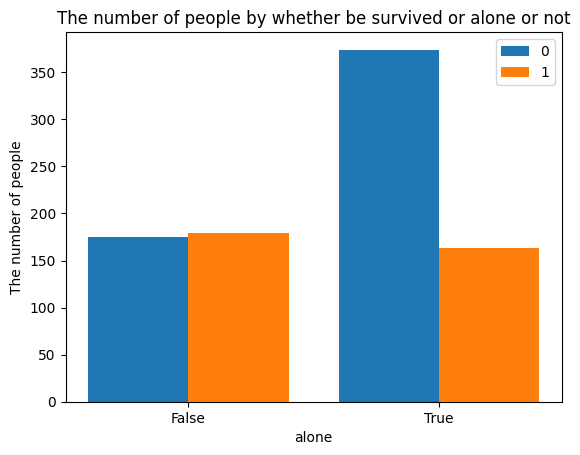

In [72]:
draw_bar(.1,
         data_b,
         x_label='alone',
         y_label='The number of people',
         title='The number of people by whether be survived or alone or not',
         t_width=.8)

答：单人乘船更不容易获救。